In [2]:
# Visualize 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


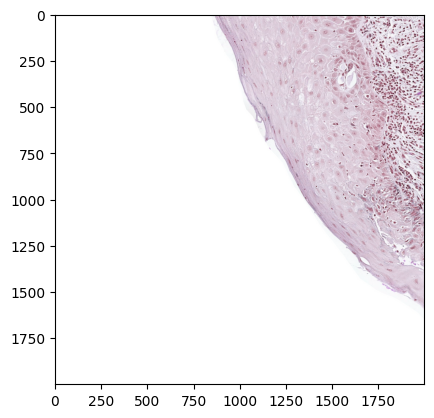

In [7]:
path = '../dataset_demo'
images_path = os.path.join(path, 'images')
annotations_path = os.path.join(path, 'annotations')
labels_path = os.path.join(path, 'labels')

# Visualize an image
img = cv2.imread(os.path.join(images_path, 'P19_3_1.tif'))
plt.imshow(img)

In [39]:
# Open all the files .xml in the folder annotations and load them in a dataframe
import pandas as pd
import xml.etree.ElementTree as ET

def xml_to_df(path):
    xml_list = []
    for xml_file in os.listdir(path):
        tree = ET.parse(os.path.join(path, xml_file))
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df
    
xml_df = xml_to_df(annotations_path)
xml_df.head()

filename  width  height       class  xmin  ymin  xmax  ymax
0  P19_3_1.tif   2000    2000  epithelial  1007    54  1023    70
1  P19_3_1.tif   2000    2000  epithelial  1075   157  1091   173
2  P19_3_1.tif   2000    2000  epithelial  1199   163  1214   179
3  P19_3_1.tif   2000    2000  epithelial  1221    86  1236   102
4  P19_3_1.tif   2000    2000  epithelial  1321    36  1336    51

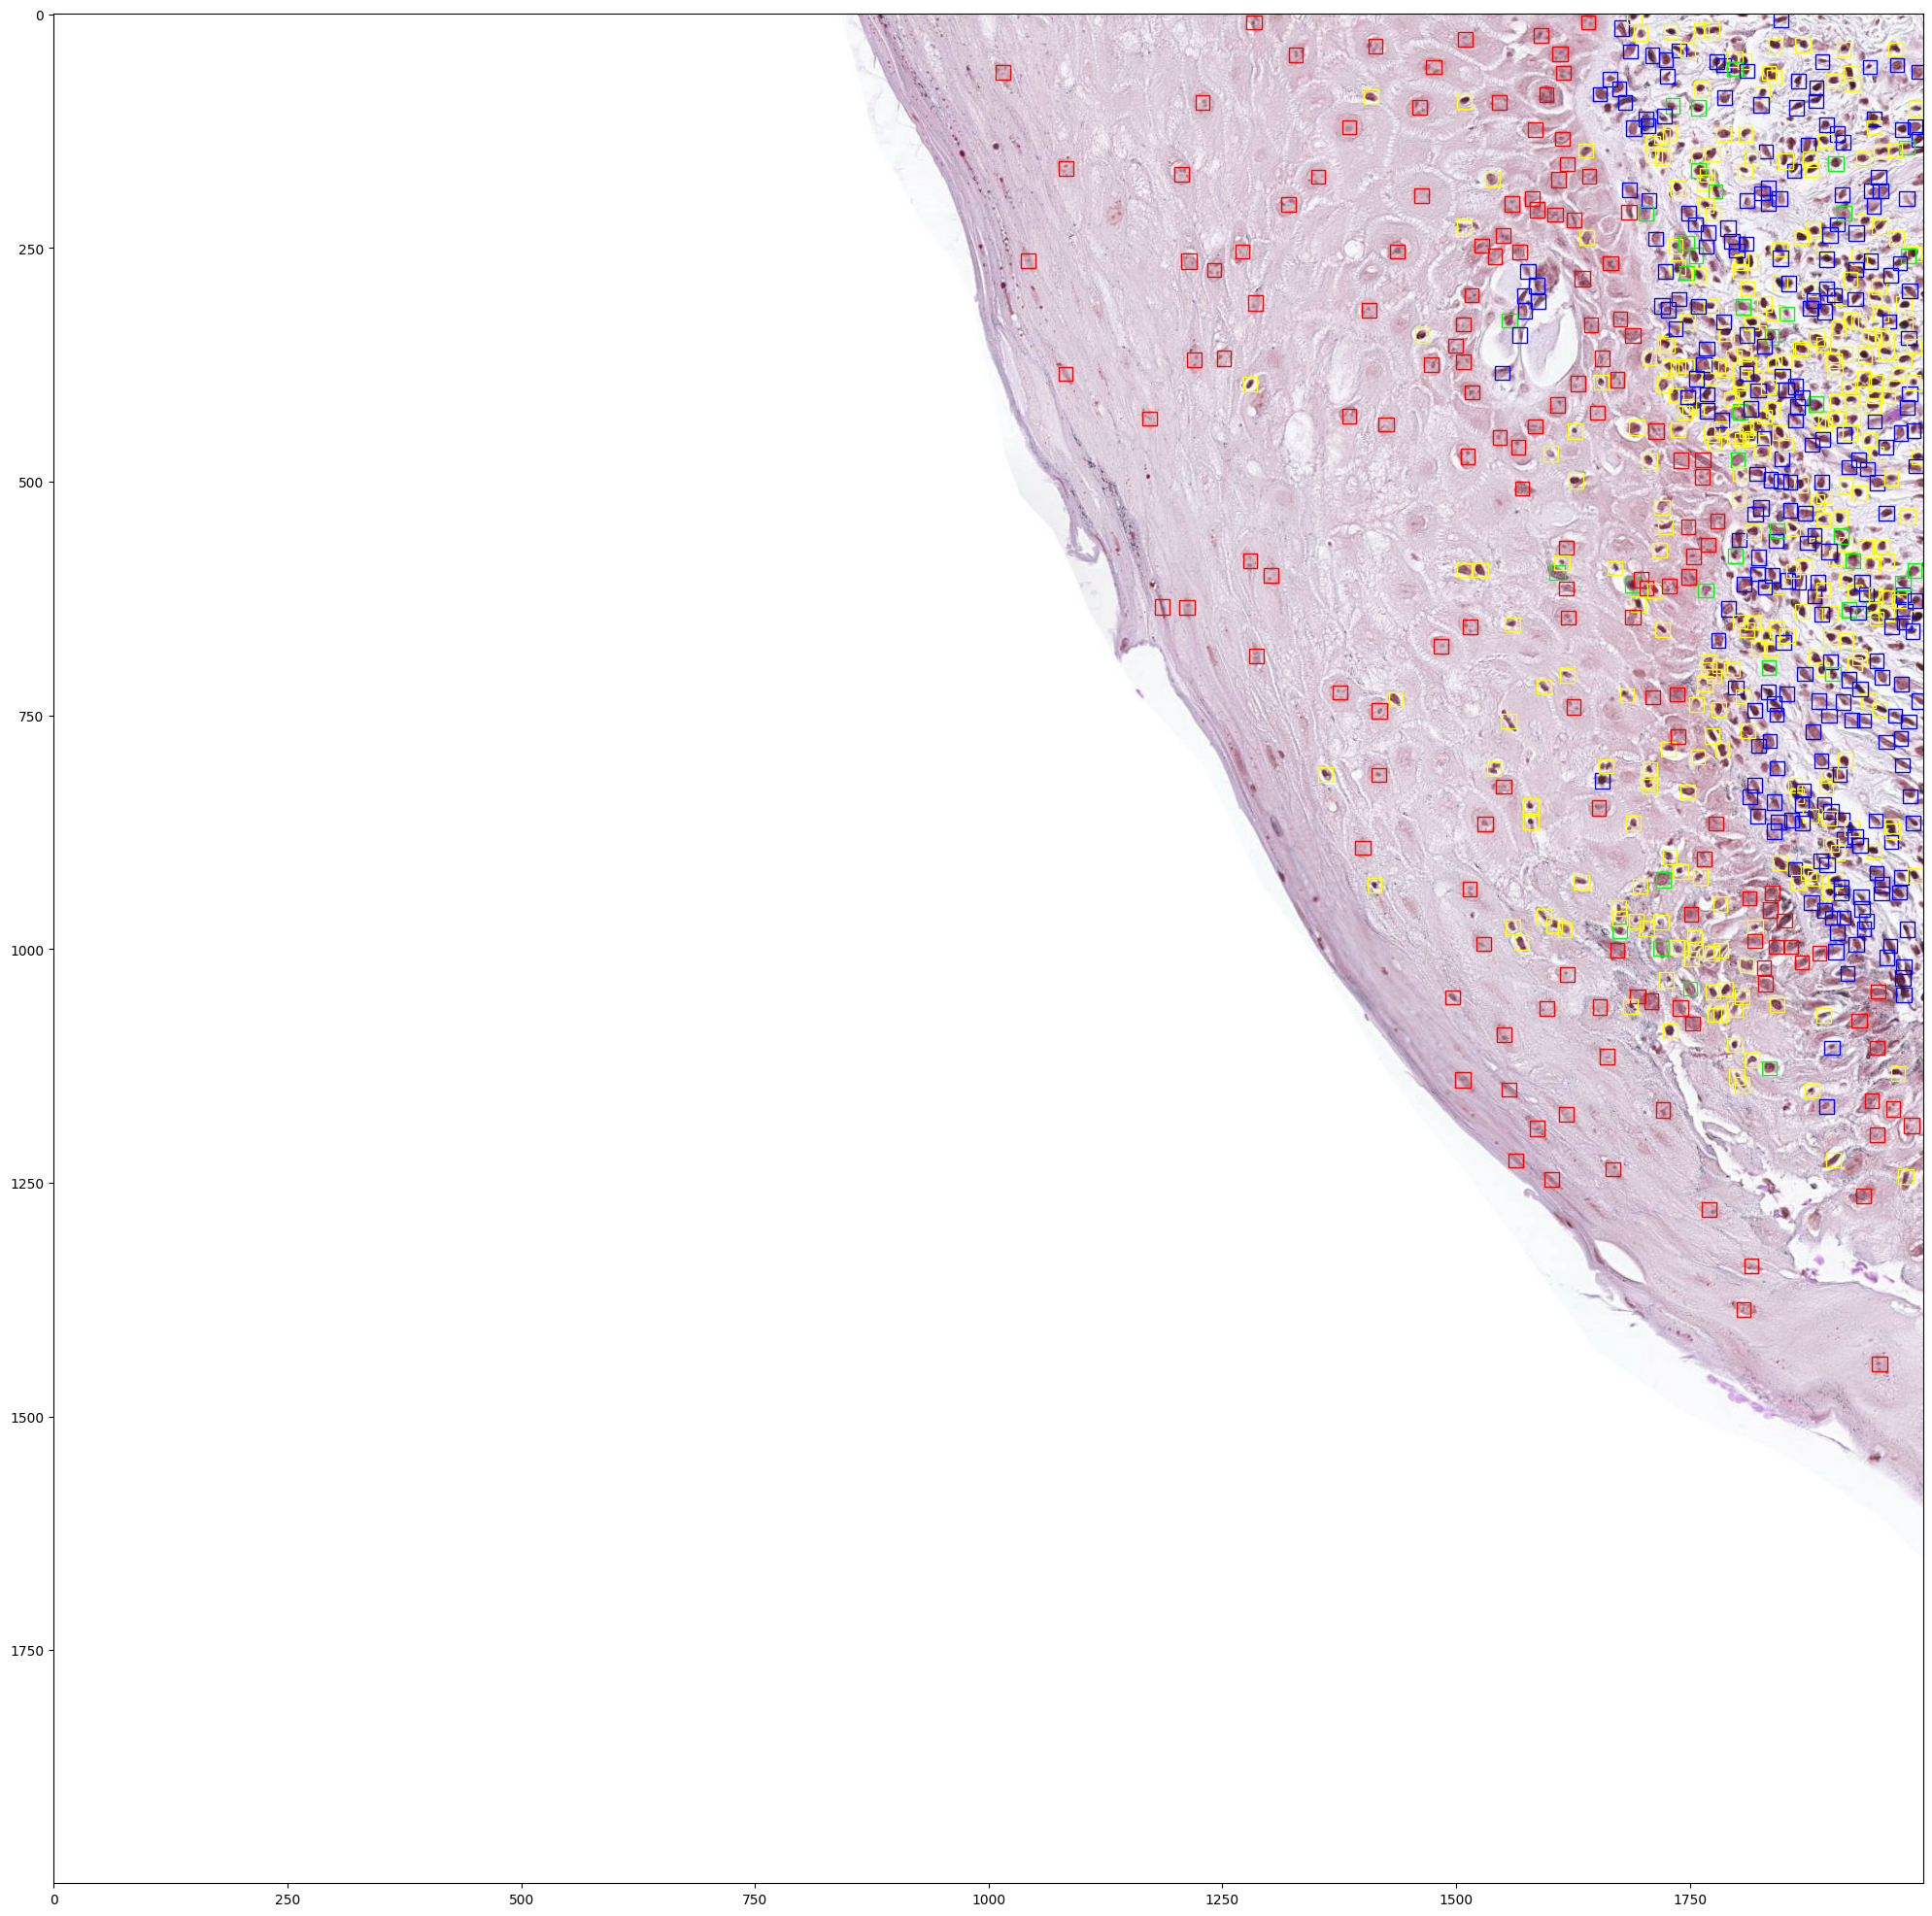

In [40]:
# Visualize the bounding boxes of the image
import matplotlib.patches as patches

# Mapping colors to classes
def get_color_map():
    color_map = {}
    color_map['apoptosis / civiatte body'] = (0, 0, 0)
    color_map['epithelial'] = (1, 0, 0)
    color_map['inflammatory'] = (0, 1, 0)
    color_map['lymphocyte'] = (1, 1, 0)
    color_map['fibroblast and endothelial'] = (0, 0, 1)
    #color_map['tumor'] = (0, 255, 255)
    return color_map

# Visualize the bounding boxes of the image
def visualize_bounding_boxes(img, xml_df, color_map):
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for index, row in xml_df.iterrows():
        xmin = row['xmin']
        ymin = row['ymin']
        xmax = row['xmax']
        ymax = row['ymax']
        class_name = row['class']
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor=color_map[class_name], facecolor='none')
        ax.add_patch(rect)
    plt.show()

color_map = get_color_map()
xml_df = xml_df[xml_df['filename'] == 'P19_3_1.tif']
#visualize_bounding_boxes(img, xml_df, color_map)

# Plot bigger image
def plot_bigger_image(img, xml_df, color_map):
    fig, ax = plt.subplots(1, figsize=(25, 25))
    ax.imshow(img)
    for index, row in xml_df.iterrows():
        xmin = row['xmin']
        ymin = row['ymin']
        xmax = row['xmax']
        ymax = row['ymax']
        class_name = row['class']
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor=color_map[class_name], facecolor='none')
        ax.add_patch(rect)
    plt.show()

plot_bigger_image(img, xml_df, color_map)



In [41]:
# Read predicted annotations xml file

def xml_to_df(path):
    xml_list = []
    for xml_file in os.listdir(path):
        tree = ET.parse(os.path.join(path, xml_file))
        root = tree.getroot()
        for member in root.findall('object'):
            #print(member[4])
            
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [42]:
# Read predicted annotations and visualize them

pred_path = '../new_data_processed_1'


pred_annotations_path = os.path.join(pred_path, 'xml')    
xml_df_pred = xml_to_df(pred_annotations_path)
xml_df_pred.head()

filename  width  height       class  xmin  \
0  HE_T12193_90_Default_Extended_1_2.tif   2000    2000  epithelial     6   
1  HE_T12193_90_Default_Extended_1_2.tif   2000    2000  epithelial    18   
2  HE_T12193_90_Default_Extended_1_2.tif   2000    2000  epithelial   117   
3  HE_T12193_90_Default_Extended_1_2.tif   2000    2000  epithelial   103   
4  HE_T12193_90_Default_Extended_1_2.tif   2000    2000  epithelial   237   

   ymin  xmax  ymax  
0   493    22   509  
1   434    34   450  
2   416   133   432  
3   373   119   389  
4   442   253   458

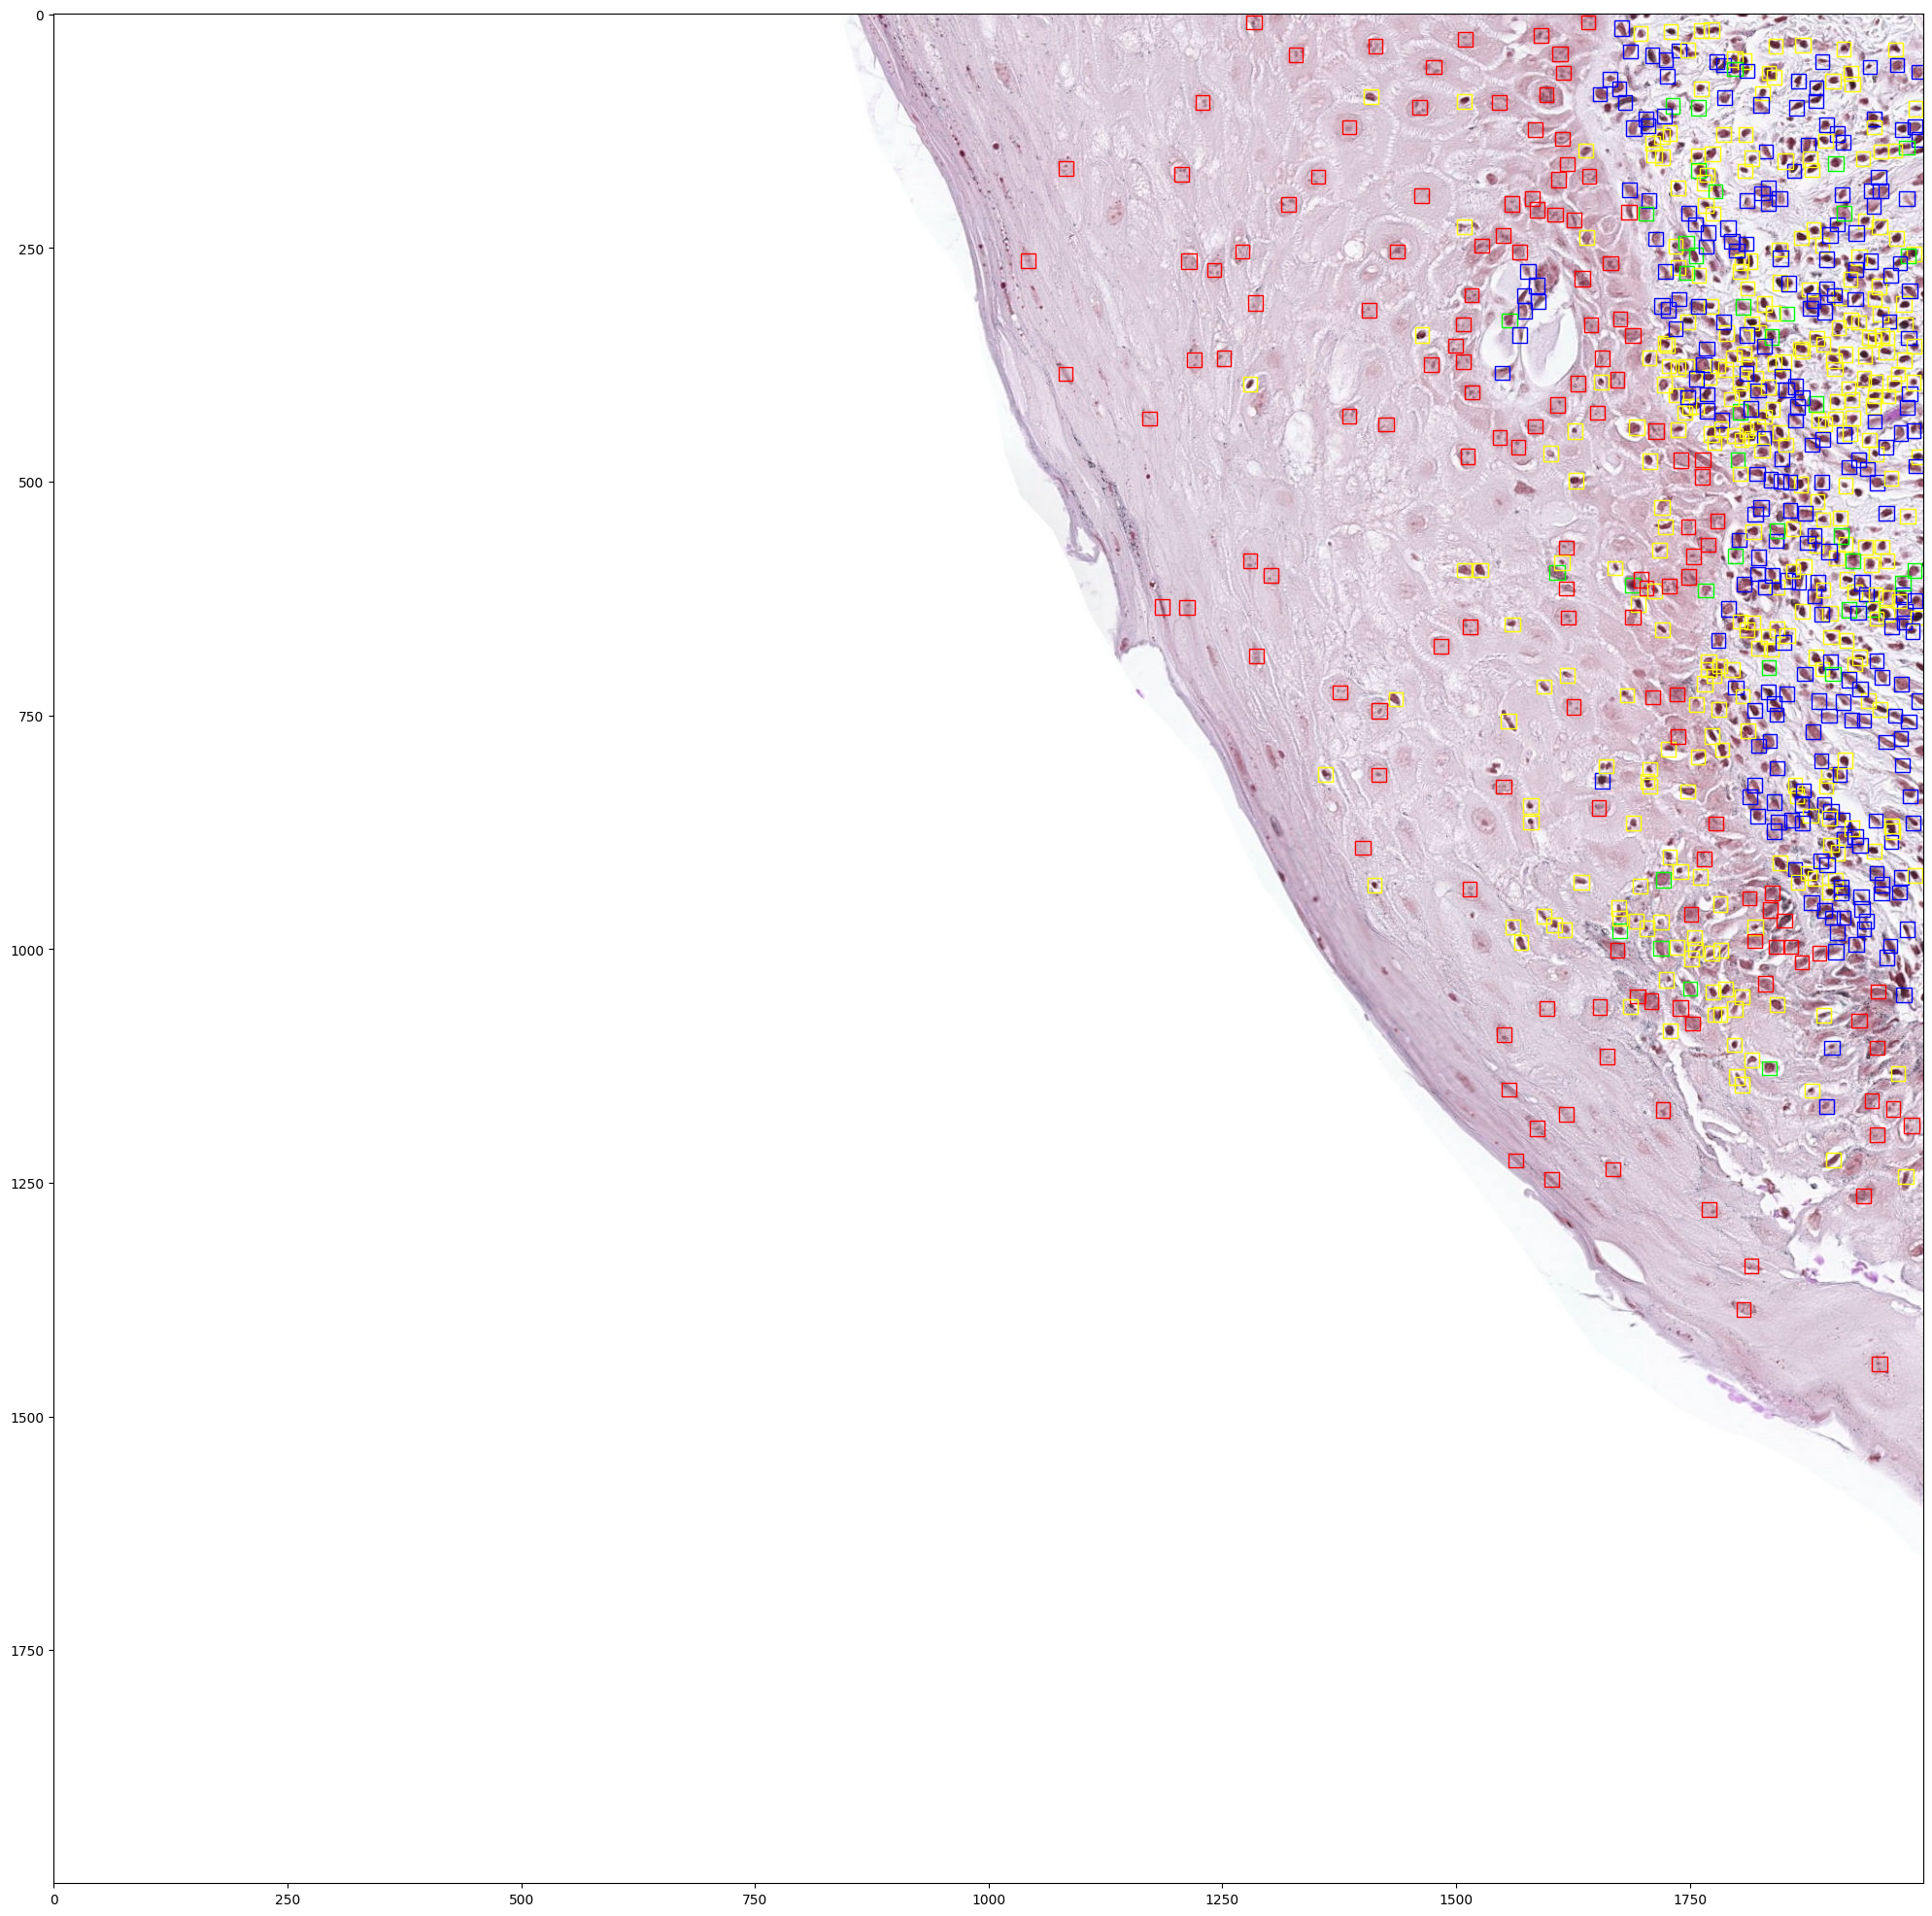

In [43]:
# Visualize the predicted bounding boxes of the image 
xml_df_pred = xml_df_pred[xml_df_pred['filename'] == 'P19_3_1.tif']
plot_bigger_image(img, xml_df_pred, color_map)